In [1]:
import pandas as pd
import sanity_checks_methods
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from time import time
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import ML_algorithms

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df = df.dropna()
df = df[df['sex'] >= 0]

sanity_checks_methods.drop_negative_age(df)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Inserting 10% null values in feature avg_glucose_level

In [ ]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

sanity_checks_methods.add_null_values(df,'avg_glucose_level', 10)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)


Inserting 10% null values in bmi feature

In [ ]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES IN BMI FEATURE')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

sanity_checks_methods.add_null_values(df,'bmi', 0.1)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES IN BMI VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

Inserting 10% null values in ever_worked feature

In [ ]:
print('NULL COUNTS BEFORE INSERTING NULL VALUES IN EVER_WORKED FEATURE')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

sanity_checks_methods.add_null_values(df,'ever_worked', 0.01)

print('\n NULL COUNTS AFTER INSERTING NULL VALUES IN EVER_WORKED FEATURE')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

Decision Tree 

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Creazione del classificatore dell'albero decisionale
tree_classifier = DecisionTreeClassifier(random_state=42)

# Definizione della griglia degli iperparametri
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': np.arange(2, 51, 2),
    'min_samples_leaf': np.arange(1, 9),
    'max_depth': [None, 5, 10, 15, 20]
}

# Utilizzo di RandomizedSearchCV per una ricerca efficiente degli iperparametri
random_search = RandomizedSearchCV(tree_classifier, param_distributions=param_dist, n_iter=100, cv=10, scoring='roc_auc', random_state=42)

# Misurazione del tempo di inizio per la ricerca degli iperparametri
start_time_hyperparameter_search = time()
random_search.fit(X_train, y_train)
end_time_hyperparameter_search = time()
hyperparameter_search_time = end_time_hyperparameter_search - start_time_hyperparameter_search

# Ottenimento dei migliori parametri e del miglior stimatore
best_params = random_search.best_params_
best_tree_classifier = random_search.best_estimator_

# Stampa dei migliori parametri e del loro ROC AUC score sul set di addestramento
y_train_pred_prob = best_tree_classifier.predict_proba(X_train)[:, 1]
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)

# Addestramento del modello sull'intero set di addestramento e misurazione del tempo di addestramento
start_time_training = time()
best_tree_classifier.fit(X_train, y_train)
end_time_training = time()
dt_training_time = end_time_training - start_time_training

# Previsioni sui set di addestramento e test
y_train_pred = best_tree_classifier.predict(X_train)
y_test_pred = best_tree_classifier.predict(X_test)

# Stampa delle prestazioni sul set di addestramento
print("\nPrestazioni sul Set di Addestramento:")
print(classification_report(y_train, y_train_pred))

# Stampa delle prestazioni sul set di test
print("\nPrestazioni sul Set di Test:")
print(classification_report(y_test, y_test_pred))

# Stampa dei migliori parametri e del tempo impiegato per la ricerca degli iperparametri e l'addestramento
print("\nMigliori Parametri:", best_params)
print("Tempo impiegato per la Ricerca degli Iperparametri:", hyperparameter_search_time, "secondi")
print("Tempo impiegato per l'Addestramento:", dt_training_time, "secondi")

plotting decision tree

In [ ]:
# Assuming random_search.best_estimator_ is your DecisionTreeClassifier and X_train is your training data

plt.figure(figsize=(20, 10))
tree_plot = plot_tree(random_search.best_estimator_, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True, impurity=False, fontsize=8)

# Get the labels of each node and display them
text = tree_plot[0]
print("Node Labels:\n", text)

plt.show()


Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3451
           1       0.97      1.00      0.99      3548

    accuracy                           0.99      6999
   macro avg       0.99      0.99      0.99      6999
weighted avg       0.99      0.99      0.99      6999


Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1548
           1       0.94      0.99      0.97      1452

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000


Migliori Parametri: {'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 20, 'criterion': 'gini'}
Tempo impiegato per la Ricerca degli Iperparametri: 10.858489990234375 secondi
Tempo impiegato per l'Addestramento: 0.009320974349975586 secondi
No

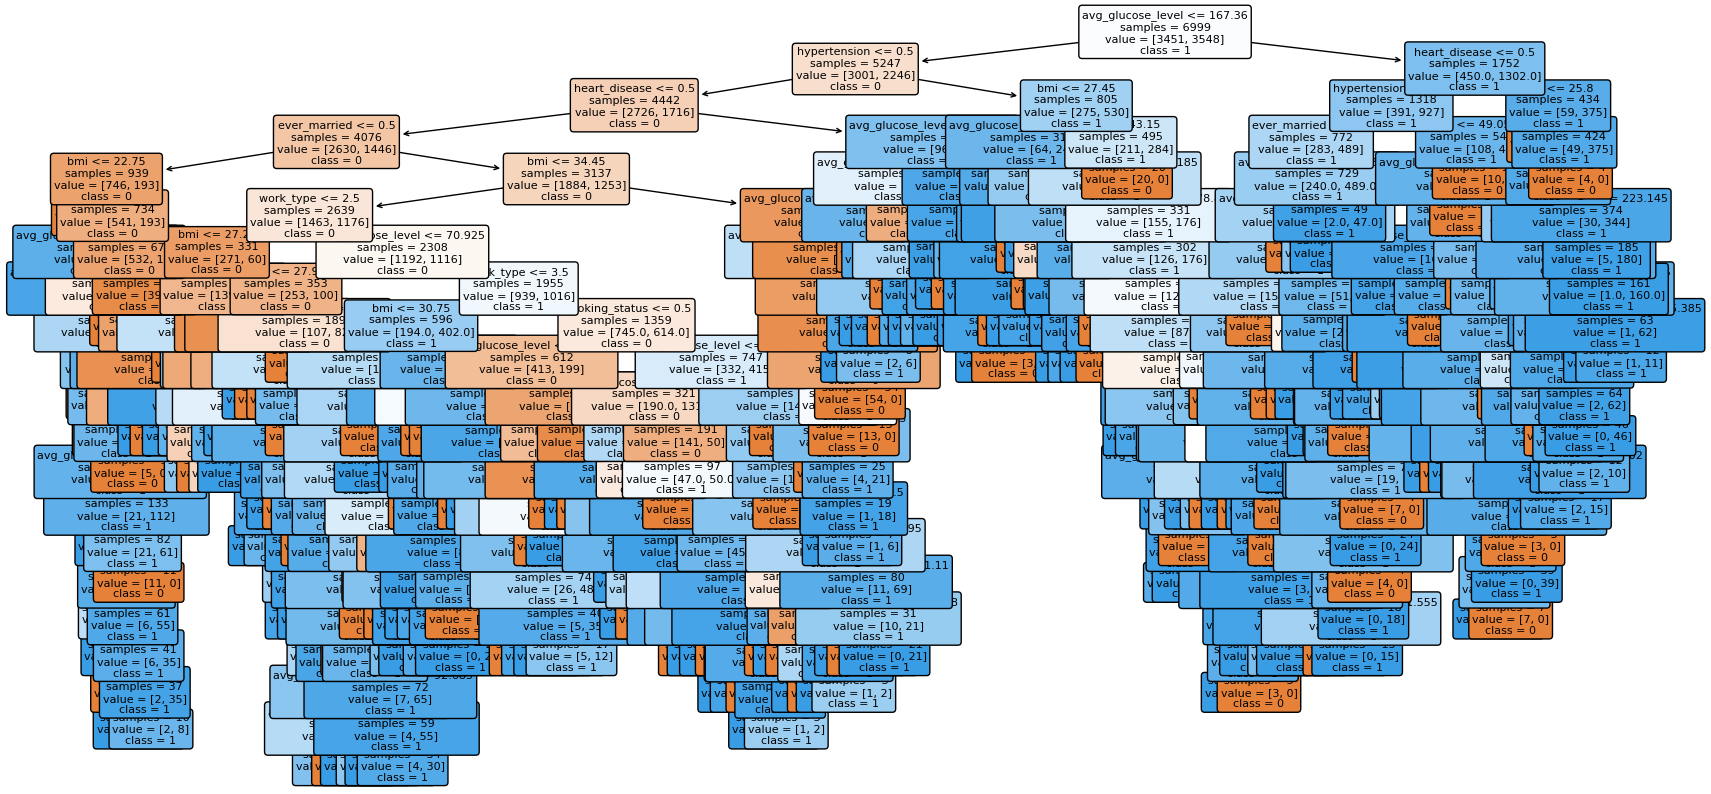

In [2]:
ML_algorithms.train_decision_tree_model(df)